# Regression Predict

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

In [71]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Gaoretelelwe'

connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

sql_query_claims = "Select * from claims_data"
sql_query_test = "Select * from test_set"

df_claims = pd.read_sql_query(sql_query_claims, connection)
df_claims = df_claims[df_claims['insurance_claim'] == 'yes']
df_claims['bmi'] = pd.to_numeric(df_claims['bmi'])
df_claims['children'] = pd.to_numeric(df_claims['children'])
df_claims['steps'] = pd.to_numeric(df_claims['steps'])
df_claims['age'] = pd.to_numeric(df_claims['age'])
df_claims['claim_amount'] = pd.to_numeric(df_claims['claim_amount'])

df_test = pd.read_sql_query(sql_query_test, connection)

df_claims_no_labels = df_claims.drop(['insurance_claim', 'claim_amount'], axis=1)
df_test_no_index = df_test.drop(['row_id'], axis=1)

df_combined = pd.concat([df_claims_no_labels, df_test_no_index],sort=False).reset_index(drop=True)

df_claims

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.92400
1,18,male,33.77,3008,1,no,southeast,yes,1725.55230
4,32,male,28.88,8010,0,no,northwest,yes,3866.85520
6,46,female,33.44,3002,1,no,southeast,yes,8240.58960
10,25,male,26.22,8006,0,no,northeast,yes,2721.32080
...,...,...,...,...,...,...,...,...,...
1330,57,female,25.74,8003,2,no,southeast,yes,12629.16560
1331,23,female,33.40,3004,0,no,southwest,yes,10795.93733
1334,18,female,31.92,3003,0,no,northeast,yes,2205.98080
1335,18,female,36.85,3008,0,no,southeast,yes,1629.83350


# Pre-processing

In [72]:
# Lables
y = df_claims['claim_amount']

# Features
X = df_claims.drop(['insurance_claim', 'claim_amount'], axis=1)

# Index
r = df_test['row_id']

# Transforming the features

In [73]:
combined_transformed = pd.get_dummies(df_combined, drop_first=True)

# split the transformed DataFrame
X_transformed = combined_transformed.iloc[:len(y), :]
test_transformed = combined_transformed.iloc[len(y):, :]

# Train/Test split

In [74]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=47)

# Training

In [75]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

#Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=50)
tree.fit(X_train, y_train)

#Random Forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=23)
forest.fit(X_train, y_train)

#Support Vector Machines (SVC)
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Predicting

In [88]:
pred_lm = lm.predict(X_test)
pred_knn = knn.predict(X_test)
pred_tree = tree.predict(X_test)
pred_forest = forest.predict(X_test)
pred_svm = svm.predict(X_test)

# Testing the prediction

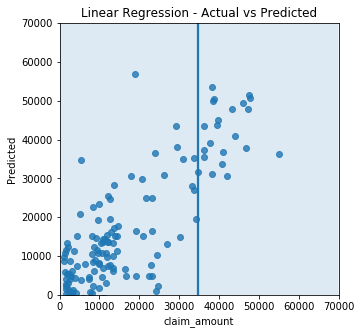

In [89]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Linear Regression - Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_lm)

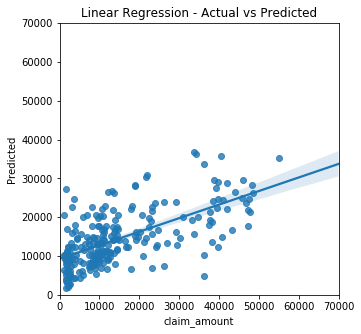

In [90]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('KNN - Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_knn)

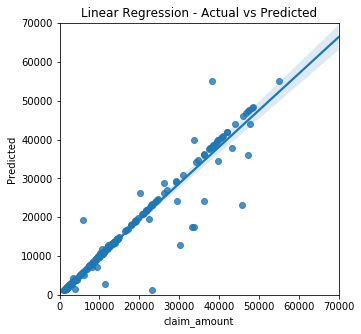

In [91]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Decision Tree - Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_tree)

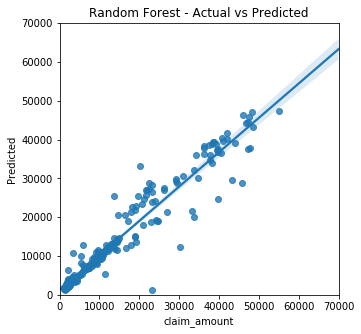

In [92]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Random Forest - Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_forest)

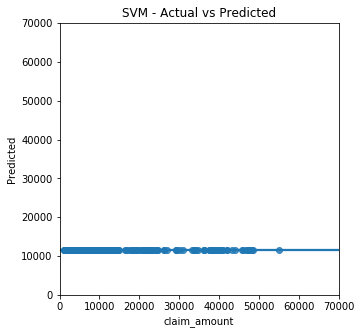

In [93]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('SVM - Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sns.regplot(x=y_test, y=pred_svm)

In [94]:
from sklearn import metrics

print('Linear Regression RMSE:', metrics.mean_squared_error(y_test, pred_lm) ** 0.5)
print('KNN RMSE:', metrics.mean_squared_error(y_test, pred_knn) ** 0.5)
print('Decision Tree RMSE:', metrics.mean_squared_error(y_test, pred_tree) ** 0.5)
print('Random Forest RMSE:', metrics.mean_squared_error(y_test, pred_forest) ** 0.5)
print('SVM RMSE:', metrics.mean_squared_error(y_test, pred_svm) ** 0.5)

Linear Regression RMSE: 2.4884002312141875e+18
KNN RMSE: 10238.817617434894
Decision Tree RMSE: 3468.152259161373
Random Forest RMSE: 3801.393213751374
SVM RMSE: 13638.901634062395


# Improving the model - Ridge Regression and Lasso

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

X_standardize = pd.DataFrame(X_scaled,columns=X_transformed.columns)
X_standardize.head()

,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,...,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,4.309872,-0.173963,-0.144432,-0.157699,-0.148974,-0.144432,-0.139754,-0.119368,-0.139754,-0.113739,...,0.0,0.0,0.0,0.0,0.0,0.0,1.464438,-0.512741,-0.674826,1.810715
1,-0.232025,-0.173963,-0.144432,-0.157699,-0.148974,-0.144432,-0.139754,-0.119368,-0.139754,-0.113739,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.682856,-0.512741,1.481863,-0.552268
2,-0.232025,-0.173963,-0.144432,-0.157699,-0.148974,-0.144432,-0.139754,-0.119368,-0.139754,-0.113739,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.682856,1.950303,-0.674826,-0.552268
3,-0.232025,-0.173963,-0.144432,-0.157699,-0.148974,-0.144432,-0.139754,-0.119368,-0.139754,-0.113739,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.682856,-0.512741,1.481863,-0.552268
4,-0.232025,-0.173963,-0.144432,-0.157699,-0.148974,-0.144432,7.155418,-0.119368,-0.139754,-0.113739,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.682856,-0.512741,-0.674826,-0.552268


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lm = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=100)

lm.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso'])

,Intercept
Linear,-1.412448e+16
Ridge,1.633444e+04
Lasso,1.645999e+04


# Tuning Algorithms

KNN, Decision Tree, Random Forest and SVM


Tuned Linear Regression RMSE:
k=3: 14485.101080557162
k=5: 13836.349471791815
k=20: 11979.473134057574
k=100: 11979.473134057574

Tuned Decision Tree RMSE:
max_depth=2; min_samples_leaf=5: 7453.054829351788
max_depth=5; min_samples_leaf=4: 7514.69174824829
max_depth=10; min_samples_leaf=3: 7248.8948165255015

Tuned Random Forest RMSE:
trees=5: 6802.45473239942
trees=20: 6764.287969763116
trees=100: 6821.988006631337

Tuned SVM RMSE:
kernel=linear, C=100, gamma=20: 8198.327979358544
kernel=rbf, C=10, gamma=0.01: 13541.680928703721
kernel=poly, C=20, gamma=1: 13725.742707053663


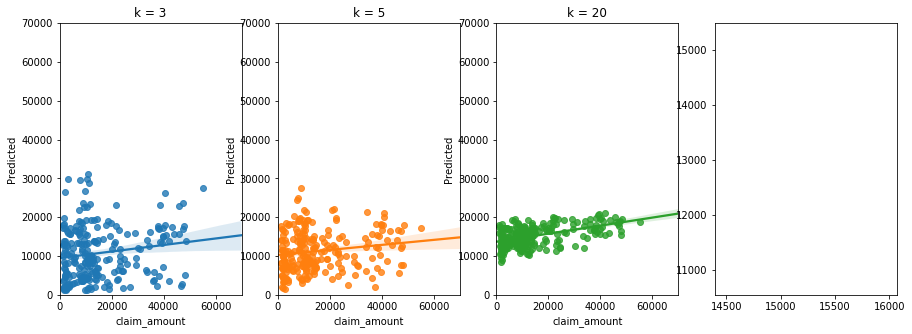

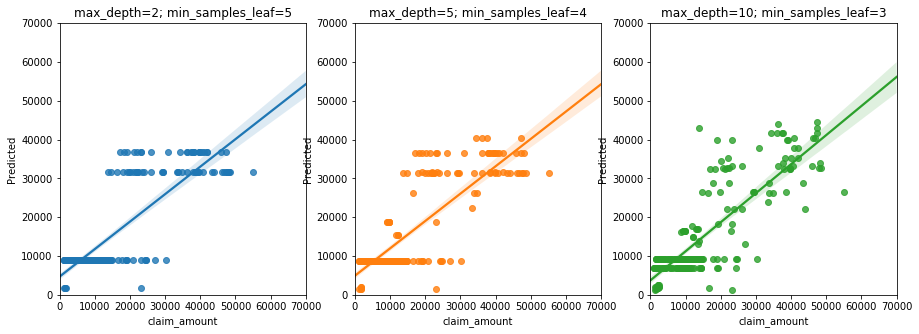

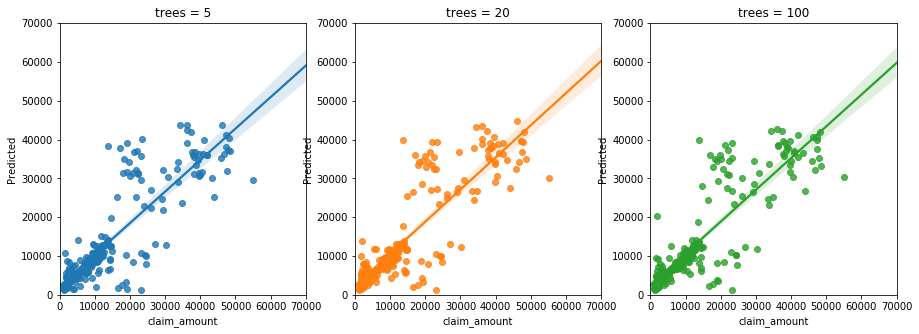

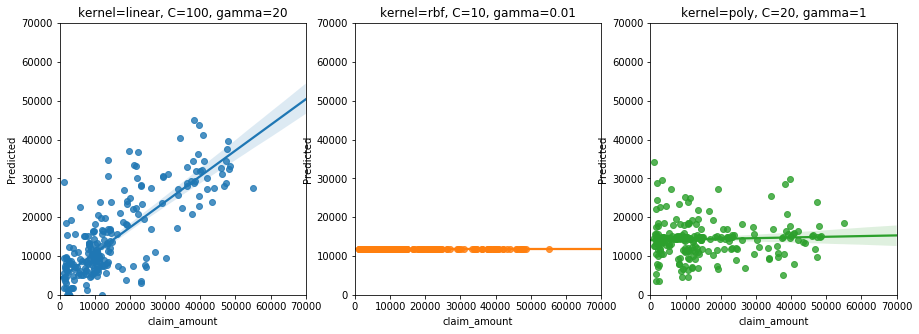

In [100]:
from sklearn import metrics

knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_20 = KNeighborsRegressor(n_neighbors=20)
knn_100 = KNeighborsRegressor(n_neighbors=100)

# max_depth=2 and min_samples_leaf=5
tree_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, random_state=50)
# max_depth=5 and min_samples_leaf=4
tree_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=50)
# max_depth=10 and min_samples_leaf=3
tree_3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=50)

# 5 trees in forest
forest_1 = RandomForestRegressor(n_estimators=5, random_state=50)
# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, random_state=50)
# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, random_state=50)

# kernel=linear, C=100, gamma=20
svm_1 = SVR(kernel='linear', C=100, gamma=20)
# kernel=rbf, C=10, gamma=0.01
svm_2 = SVR(kernel='rbf', C=10, gamma=0.01)
# kernel=poly, C=20, gamma=1
svm_3 = SVR(kernel='poly', C=20, gamma=1)

knn_3.fit(X_train, y_train)
knn_5.fit(X_train, y_train)
knn_20.fit(X_train, y_train)
knn_100.fit(X_train, y_train)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)
tree_3.fit(X_train, y_train)

forest_1.fit(X_train, y_train)
forest_2.fit(X_train, y_train)
forest_3.fit(X_train, y_train)

svm_1.fit(X_train, y_train)
svm_2.fit(X_train, y_train)
svm_3.fit(X_train, y_train)

pred_knn_3 = knn_3.predict(X_test)
pred_knn_5 = knn_5.predict(X_test)
pred_knn_20 = knn_20.predict(X_test)
pred_knn_100 = knn_20.predict(X_test)

pred_tree_1 = tree_1.predict(X_test)
pred_tree_2 = tree_2.predict(X_test)
pred_tree_3 = tree_3.predict(X_test)

pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

pred_svm_1 = svm_1.predict(X_test)
pred_svm_2 = svm_2.predict(X_test)
pred_svm_3 = svm_3.predict(X_test)

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=4)

# Create list of titles and predictions to use in for loop
pred = [pred_knn_3, pred_knn_5, pred_knn_20, pred_knn_100]
title = ['k = 3', 'k = 5', 'k = 20', 'k = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_tree_1, pred_tree_2, pred_tree_3]
title = ['max_depth=2; min_samples_leaf=5', 'max_depth=5; min_samples_leaf=4', 'max_depth=10; min_samples_leaf=3']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)
    
# Create list of titles and predictions to use in for loop
pred = [pred_forest_1, pred_forest_2, pred_forest_3]
title = ['trees = 5', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i]) 

# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

# Create list of titles and predictions to use in for loop
pred = [pred_svm_1, pred_svm_2, pred_svm_3]
title = ['kernel=linear, C=100, gamma=20', 'kernel=rbf, C=10, gamma=0.01', 'kernel=poly, C=20, gamma=1']

# Loop through all axes to plot each model's results 
for i in range(3):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 70000)
    ax[i].set_ylim(0, 70000)
    sns.regplot(x=y_test, y=pred[i], ax=ax[i])    
   

print('') 
print('Tuned Linear Regression RMSE:')
print('k=3:', metrics.mean_squared_error(y_test, pred_knn_3) ** 0.5)
print('k=5:', metrics.mean_squared_error(y_test, pred_knn_5) ** 0.5)
print('k=20:', metrics.mean_squared_error(y_test, pred_knn_20) ** 0.5)
print('k=100:', metrics.mean_squared_error(y_test, pred_knn_100) ** 0.5)

print('')
print('Tuned Decision Tree RMSE:')
print('max_depth=2; min_samples_leaf=5:', metrics.mean_squared_error(y_test, pred_tree_1) ** 0.5)
print('max_depth=5; min_samples_leaf=4:', metrics.mean_squared_error(y_test, pred_tree_2) ** 0.5)
print('max_depth=10; min_samples_leaf=3:', metrics.mean_squared_error(y_test, pred_tree_3) ** 0.5)

print('')
print('Tuned Random Forest RMSE:')
print('trees=5:', metrics.mean_squared_error(y_test, pred_forest_1) ** 0.5)
print('trees=20:', metrics.mean_squared_error(y_test, pred_forest_2) ** 0.5)
print('trees=100:', metrics.mean_squared_error(y_test, pred_forest_3) ** 0.5)

print('')
print('Tuned SVM RMSE:')
print('kernel=linear, C=100, gamma=20:', metrics.mean_squared_error(y_test, pred_svm_1) ** 0.5)
print('kernel=rbf, C=10, gamma=0.01:', metrics.mean_squared_error(y_test, pred_svm_2) ** 0.5)
print('kernel=poly, C=20, gamma=1:', metrics.mean_squared_error(y_test, pred_svm_3) ** 0.5)

# Deciding on the algorithms (& tunings)

Decision Tree has the lowest RMSE.

In [101]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=50)
tree.fit(X_train, y_train)

test_pred_tree = tree.predict(test_transformed)

test_pred_tree

array([ 4402.233  , 35491.64   ,  4402.233  , 35491.64   , 35491.64   ,
       35491.64   ,  1137.011  ,  4402.233  ,  4402.233  ,  4402.233  ,
       18310.742  , 18310.742  , 16138.76205, 18310.742  ,  4402.233  ,
       18310.742  ,  4402.233  ,  1137.011  , 48673.5588 , 48673.5588 ,
        4402.233  ,  1137.011  ,  4402.233  ,  4402.233  ,  4402.233  ,
        4402.233  ,  4402.233  ,  4402.233  , 16138.76205,  4402.233  ,
        1137.011  ,  4402.233  ,  4402.233  ,  4402.233  ,  4402.233  ,
       48673.5588 ,  4402.233  ,  4402.233  ,  1137.011  ,  4402.233  ,
        4402.233  , 48673.5588 , 48673.5588 ,  1137.011  ,  4402.233  ,
       16138.76205,  4402.233  ,  4402.233  ,  4402.233  ,  4402.233  ,
       48673.5588 , 16138.76205,  4402.233  ,  1137.011  ,  4402.233  ,
       16138.76205,  4402.233  ,  4402.233  ,  4402.233  , 48673.5588 ,
       16138.76205,  4402.233  ,  4402.233  ,  4402.233  ,  1137.011  ,
        4402.233  ,  4402.233  ,  4402.233  ,  1137.011  ,  1137

In [105]:
submission = pd.DataFrame({'row_id':r.values,'prediction': test_pred_tree})
submission

,row_id,prediction
0,1,4402.2330
1,2,35491.6400
2,3,4402.2330
3,4,35491.6400
4,5,35491.6400
...,...,...
295,296,1137.0110
296,297,48673.5588
297,298,35491.6400
298,299,1137.0110


In [106]:
submission.to_sql('regression_model_results', con=connection, if_exists='append', index=False,method='multi',chunksize=500)

In [ ]:
connection.table_names()